In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from sklearn.model_selection import train_test_split
import seaborn as sns
from nltk.tokenize import sent_tokenize

# read data (replace with your own path)
df = pd.read_csv('winequality-red.csv', sep=';',index_col=None,na_values='?')
print(df.describe())
from sklearn.preprocessing import OneHotEncoder



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Plotting pearson correlation

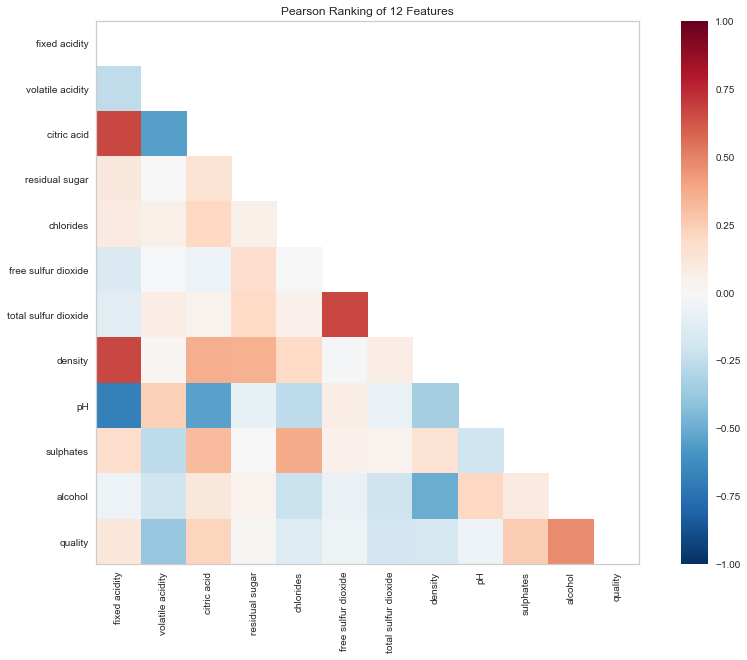

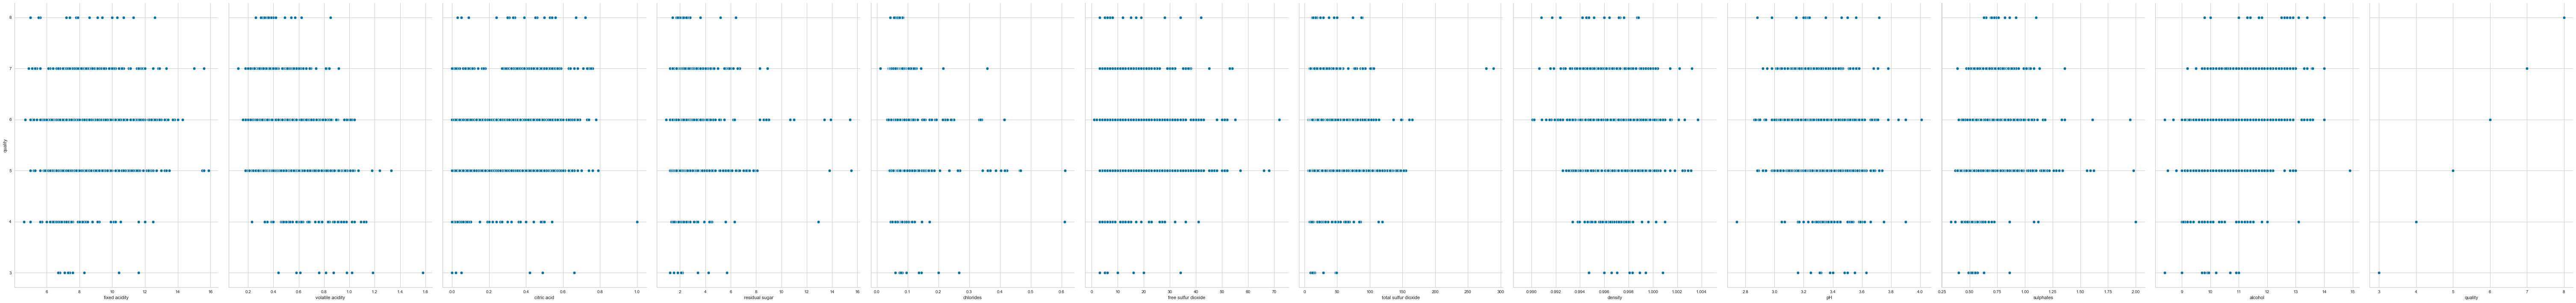

In [2]:
def pearsonCor(data):
    visualizer = Rank2D(algorithm="pearson",size=(1080, 720))
    visualizer.fit_transform(data)# or df_scaled
    visualizer.show()
    
    
def scatPlot(data):
    # visualize the relationship between the features and the response using scatterplots
    sns.pairplot(data, x_vars=data.columns, y_vars='quality', height=10, aspect=0.7)


pearsonCor(df)
scatPlot(df)

## Drop columns

In [3]:
def dropColumns(data,listOfValues):
    list=listOfValues
    data=data
    for i in range (len(list)):
        data=data.drop([list[i]],axis=1)
    return data

#Drops chose columns
df_dropped=dropColumns(df,["quality","density","fixed acidity",'residual sugar','citric acid','free sulfur dioxide','total sulfur dioxide'])#
#df_dropped=dropColumns(df,["quality"])

#Save names of columns to variable
names = df_dropped.columns.get_values()
print(names)
mean = df_dropped.mean().values
std = df_dropped.std().values
print(mean)
print(std)

['volatile acidity' 'chlorides' 'pH' 'sulphates' 'alcohol']
[ 0.52782051  0.08746654  3.3111132   0.65814884 10.42298311]
[0.1790597  0.0470653  0.15438646 0.16950698 1.06566758]


## FIT

In [4]:
from sklearn.model_selection import train_test_split
# split into explanatory and response variables 

#Scaling values
scaler = StandardScaler()
df_y=pd.DataFrame(scaler.fit_transform(df))
df_x=pd.DataFrame(scaler.fit_transform(df_dropped))

#Choosing which values to use on Fit:
print(names)

#both scaled
X = df_x.iloc[:,0:]
Y = df_y.iloc[:,11]


print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)

def function(X,Y):
    
    # build and fit model
    reg = linear_model.LinearRegression()
    reg.fit(X_train,Y_train)

    # output model
    print("Coefficients:" ,reg.coef_)
    print("Intercept:", reg.intercept_)

    # compute predicted values
    Y_pred = reg.predict(X_test)

    # compute error statistics
    mse = mean_squared_error(Y_test, Y_pred)
    r2s = r2_score(Y_test, Y_pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    return reg.coef_

['volatile acidity' 'chlorides' 'pH' 'sulphates' 'alcohol']
(1599, 5)
(1599,)


## Coefficients

In [5]:
# standarise variables and rerun MLR analysis to
# estimate variable importance.

dfn = pd.DataFrame(scaler.fit_transform(df))
coef = function(X,Y)
print(coef)

Coefficients: [-0.24269054 -0.09255417 -0.10230787  0.13606521  0.4310639 ]
Intercept: 0.009954274223904333
MSE =  0.6577374930155119
R2s =  0.3257866157041702
[-0.24269054 -0.09255417 -0.10230787  0.13606521  0.4310639 ]


## Plotting Coefficiency

(5,)
(5,)


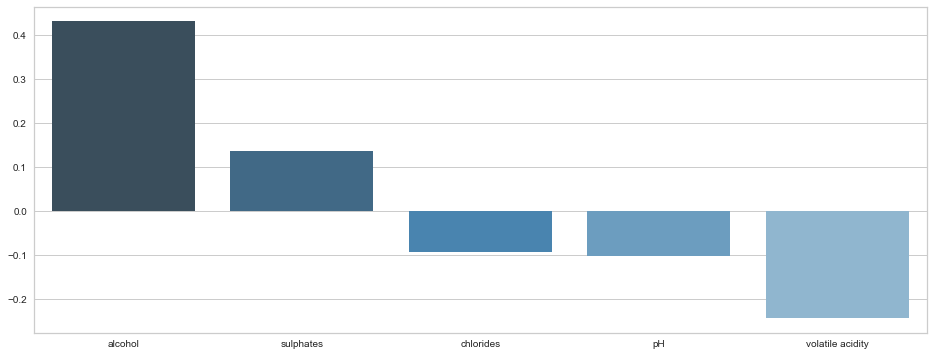

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print(coef.shape)
print(names.shape)
coef2 = pd.DataFrame(coef.reshape(1,coef.shape[0]))
coef2.columns=names

coef2=coef2.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=coef2,palette="Blues_d")